# Load the trajectory and calculate the pairwise distance 

- distance_arr: the pairwise distance matrix
- distance_rank: the ranking of each distance standard deviation
- distance_details: detailed information of this calculation (atom name, atom index, residue name, mean distance, distance standard deviation, mean standard deviation etc)
<h4>Variables (trajectory not included): </h4>
<p>1. mask1: reference atoms to monitor</p>
<p>2. mask2: where to select partner atoms</p>
<p>3. use_mean (Default False): use the mean structure as reference</p>

In [9]:
import pytraj as pt 
import Doana as da 
import matplotlib.pyplot as plt 
import numpy as np 

pdbfile = "/home/miemie/Downloads/C0084GULFky4/C0084GULFky4_PDB.pdb"
trajfile = "/home/miemie/Downloads/C0084GULFky4/C0084GULFky4_TRJ.nc"

traj = pt.load(trajfile, top=pdbfile)
traj.top.set_reference(traj[0])
traj.superpose("@CA")

# mask 1 (":LIG&!@H="): Ligand <and> no hydrogen atoms 
# mask 2 (":LIG<:7&@C,N,O,CA,CB"): Residues within 7 Angstorm of ligand <and> only C,N,O,CA,CB
distance_arr, distance_rank, distance_details= da.analysis.PairwiseDist(traj, ":LIG&!@H=", ":LIG<:7&@C,N,O,CA,CB", 
                                                                        use_mean=True)

print(distance_arr, distance_rank, distance_details)
print(f"PD STD: {distance_details['overall_std']}")
print(f"RMSD: {pt.rmsd(traj, '@CA').mean()}")

[[ 5.88396803  6.71752109  6.74134354 ...  4.13856534  5.11282552
   4.07716588]
 [ 6.04679056  6.52200119  6.73775756 ...  5.64656826  6.68408883
   5.47732411]
 [ 9.04463583  9.88235982  9.98823818 ...  4.77304905  5.62283635
   5.5111016 ]
 ...
 [ 8.46433637  9.59483124  8.60282444 ...  5.3539791   5.81395551
   5.95770166]
 [ 9.76280561 11.87748332  9.69491457 ...  8.56215733  8.7129147
   9.43077316]
 [ 7.86667536  8.40031795  7.67445918 ...  4.645665    4.46244189
   4.69693781]] [ 4  3 19 ...  6 10  5] {'stds': array([1.42449849, 1.11548923, 2.11461788, ..., 1.86125371, 1.96268759,
       1.84876188]), 'means': array([4.91966482, 5.97576193, 5.43026574, ..., 5.04694753, 6.11818562,
       5.19080467]), 'overall_std': 1.886605863419677, 'lig_atom_names': array(['C1', 'C2', 'N12', ..., 'C10', 'CL8', 'CL11'], dtype='<U4'), 'lig_atomids': array([27591, 27592, 27593, ..., 27614, 27615, 27616]), 'lig_resids': array([8305, 8305, 8305, ..., 8305, 8305, 8305]), 'lig_resnames': array(['LI

In [10]:
import nglview as nv
viewer = nv.show_pytraj(traj)
viewer

NGLWidget(count=1001)

# Display the details of the pairwise partners

In [11]:
for idx in range(len(distance_details["lig_atomids"])):
  lidx = distance_details["lig_atomids"][idx]
  lres = distance_details["lig_resnames"][idx]
  lrid = distance_details["lig_resids"][idx]
  latn = distance_details["lig_atom_names"][idx]
  pidx = distance_details["pro_atomids"][idx]
  pres = distance_details["pro_resnames"][idx]
  patn = distance_details["pro_atom_names"][idx]
  prid = distance_details["pro_resids"][idx]
  distmean = distance_details["means"][idx]
  diststd = distance_details["stds"][idx]
  distrank = distance_rank[idx]+1
  print(f"Partner{idx:>3}: {lres:>4}{lrid:<5}@{latn:<4}({lidx:<6}) -> {pres:>4}{prid:<5}@{patn:<4}({pidx:<6}); Mean:{distmean:.3f}; Std:{diststd:.3f}; Rank: {distrank}")
  

Partner  0:  LIG8305 @C1  (27591 ) ->  TRP123  @O   (1937  ); Mean:4.920; Std:1.424; Rank: 5
Partner  1:  LIG8305 @C2  (27592 ) ->  TRP123  @O   (1937  ); Mean:5.976; Std:1.115; Rank: 4
Partner  2:  LIG8305 @N12 (27593 ) ->  ILE62   @CB  (957   ); Mean:5.430; Std:2.115; Rank: 20
Partner  3:  LIG8305 @C14 (27594 ) ->  ILE62   @CB  (957   ); Mean:5.916; Std:2.098; Rank: 17
Partner  4:  LIG8305 @O15 (27595 ) ->  TRP123  @O   (1937  ); Mean:6.091; Std:1.036; Rank: 3
Partner  5:  LIG8305 @C13 (27596 ) ->  ILE62   @CB  (957   ); Mean:4.670; Std:2.279; Rank: 24
Partner  6:  LIG8305 @C16 (27597 ) ->  ILE62   @CB  (957   ); Mean:5.673; Std:2.264; Rank: 23
Partner  7:  LIG8305 @C17 (27598 ) ->  ILE37   @O   (585   ); Mean:4.876; Std:2.363; Rank: 25
Partner  8:  LIG8305 @C18 (27599 ) ->  ILE37   @O   (585   ); Mean:4.642; Std:2.105; Rank: 18
Partner  9:  LIG8305 @C19 (27600 ) ->  ILE37   @O   (585   ); Mean:5.284; Std:1.970; Rank: 12
Partner 10:  LIG8305 @N20 (27601 ) ->  ILE125  @CB  (1988  ); M

# Make the density map of the distance STD of each atoms

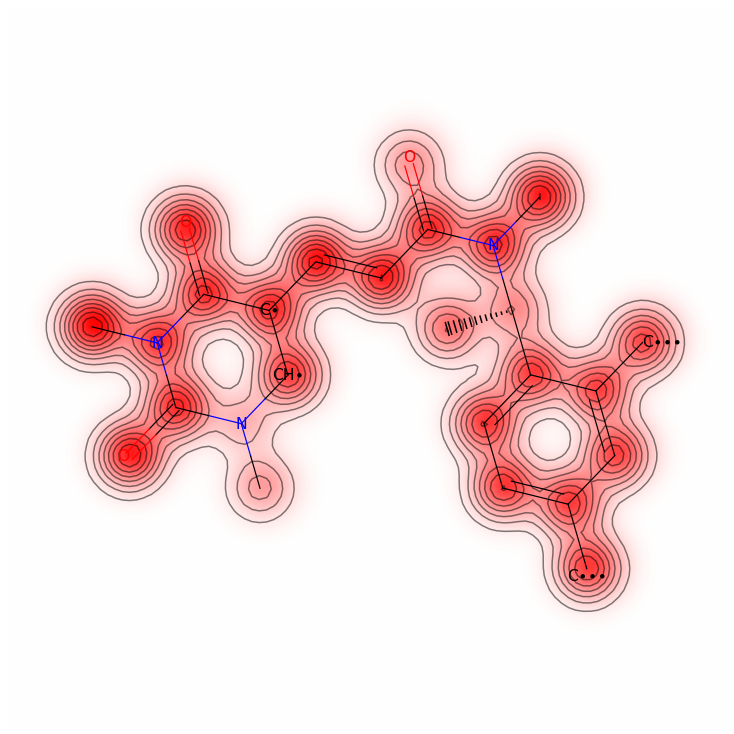

In [12]:
molfile = "/home/miemie/Downloads/C0084GULFky4/test.mol2"
# Use RDkit to read the mol2 and generate the 2D representation of the moledcule
themol = da.utils.ReadMol2(molfile);
# Pass the corresponding weight (in this case the standard deviation of the disntance)
fig = da.draw.MolDensityMap(themol, distance_details["stds"], sigma = 0.03)

# Calculate the overlapping index of the selected structure
<h4>Variables (trajectory not included): </h4>
<p>1. ligand_mask: reference structure to monitor</p>
<p>2. dist_cutoff (Default 1): within which distance consider the atom an overlap </p>
<p>3. use_mean (Default True): use the mean structure as reference </p>

Average overlapping index is 0.176


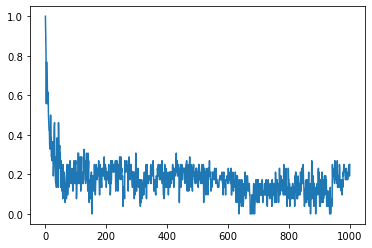

In [16]:
OI_avg, OI_details = da.analysis.OverlappingIndex(traj, ":LIG&!@H=", dist_cutoff=1.5, use_mean=False)
fig = plt.plot(OI_avg)
print(f"Average overlapping index is {np.mean(OI_avg):.3f}")
fig

# Calculate the PLIF of a MD trajectory

Selected 45 atoms
Selected 535 atoms


  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

Saved the fingerprint to file: /tmp/test.pkl
Mean OI is 0.7800442233278049


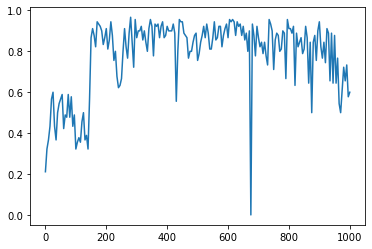

In [4]:
import Doana as da
import matplotlib.pyplot as plt
import numpy as np 

thedic = {
  "masklig" : ":LIG",
  # The mask cannot contain separate molecules
  # NOTE ESPECIALLY: ligand, water, ions, cofactors
  # If maskpro is not defined, the protein will be chosen
  "maskpro" : ":LIG<:7&!:T3P,LIG,K+,CL-",
  
  "stride" : 5,
  "topfile" : "/home/miemie/Downloads/C0084GULFky4/C0084GULFky4_PDB.pdb", 
  "trajfile" : "/home/miemie/Downloads/C0084GULFky4/C0084GULFky4_TRJ.nc",
  "outpkl":"/tmp/test.pkl", 
  
}
mdplif = da.analysis.PLIFGen_MD(thedic)
mdplif.gen()
# mdplif.calc_OI2(dist_cutoff=1.5, use_mean=True)
# plt.plot(mdplif.fp_data["OI_avg"], color="black")

mdplif.calc_OI(dist_cutoff=1.5, use_mean=True)
plt.plot(mdplif.fp_data["OI_avg"])
mdplif.savedata()
mdplif.fp_data
print("Mean OI is", np.mean(mdplif.fp_data["OI_avg"]))


# Display PLIF plot 
- X axis is the type of finger print
- Y axis is the simulation steps


FP number 3 less than desired number 7 of fingerprint, setting top Number to 3


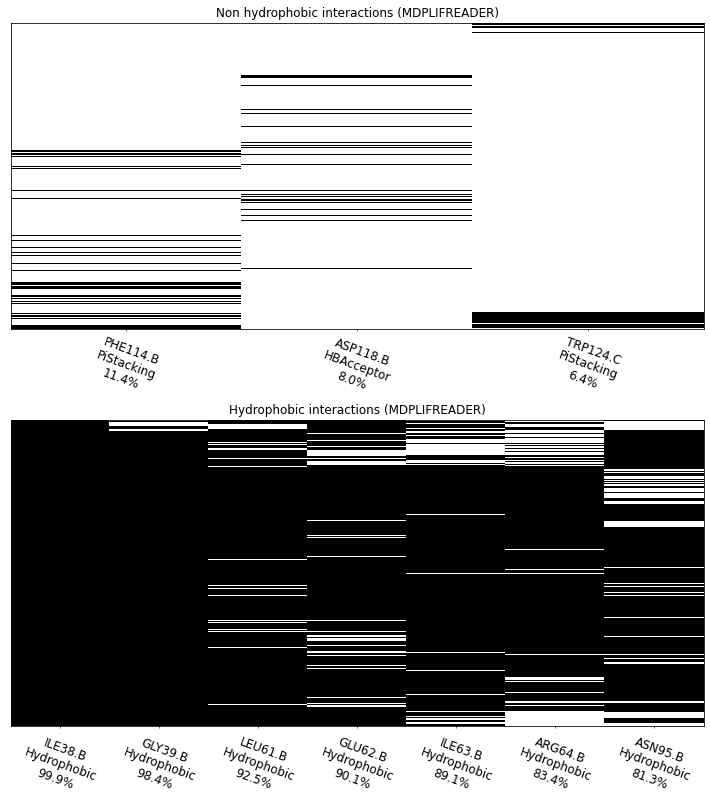

In [8]:
import Doana as da
parms = {
  "picklefile"  : "/tmp/test.pkl", 
  "outputdir"   : "/tmp/", 
  "file_prefix" : "MDPLIFREADER", 
  "TOPN"        : 7,
}

MDreader = da.analysis.PLIFRead_MD(parms)
MDreader.savefig()
